In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataframe
df = pd.read_csv("demographics_data.csv")

In [5]:
#sample dataset
df.sample(10)

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Life_expectancy,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita
183,20.785714,24.660162,66.365766,4.850342,10.278571,2.476750,5.566154,97.166667,97.809524,96.114286,...,4.615789,26.774151,68.818841,16.588048,1.046707,174.126282,7.174237,23.620653,10.027206,9.350000
194,15.342333,18.300000,70.800000,3.398408,6.717361,1.834194,1.976733,90.611111,90.962963,84.771429,...,196.210526,6.863894,71.754222,34.450000,0.323011,121.269816,6.620000,21.500000,14.440000,8.000000
160,10.675000,9.425000,86.300000,9.121712,10.122222,1.473333,3.744828,93.166667,82.208333,90.611111,...,32.105263,1.195805,76.826355,7.600000,3.584650,111.984387,7.174237,23.655556,11.980000,12.900000
103,20.577222,6.550000,83.300000,3.287305,8.928611,2.507361,10.005700,93.962963,94.047619,97.333333,...,140.263158,11.752959,67.846999,20.900000,3.730572,5.937542,9.700000,26.566667,30.700000,8.500000
179,25.757917,45.025000,45.550000,7.311529,10.592528,3.149472,2.800000,75.916667,75.727273,74.611111,...,811.105263,42.120833,59.491028,25.500000,0.721980,36.855405,13.614286,21.011111,11.800000,9.900000
214,17.312500,24.660162,66.365766,6.319352,5.811905,2.424778,11.740000,80.893562,82.553103,79.684786,...,129.420463,35.765492,76.426285,16.588048,1.647500,303.976508,7.174237,23.620653,10.027206,6.223279
107,12.272222,8.400000,80.250000,5.752987,5.366667,1.396361,6.142727,88.277778,94.416667,90.750000,...,83.157895,0.735500,75.956775,10.900000,1.412289,480.395428,6.750000,26.655556,26.180000,10.050000
92,26.181500,32.450000,56.600000,3.683651,9.098333,3.304639,0.780629,61.694444,50.000000,62.117647,...,251.105263,4.195791,62.520639,19.600000,0.629388,356.894623,2.933333,14.255556,16.860000,5.000000
26,29.930000,27.025000,60.550000,5.393251,9.890778,4.008861,1.185629,66.333333,85.368421,72.000000,...,141.842105,8.477729,62.323806,19.350000,0.724310,7.886750,8.600000,23.620653,14.080000,5.350000
68,14.947222,24.660162,66.365766,6.319352,8.141667,2.488889,3.682881,80.893562,82.553103,79.684786,...,129.420463,7.763340,78.852476,16.588048,1.445380,33.648578,7.174237,23.620653,10.027206,6.223279


In [6]:
#reorder the dependent variable "Life_expectancy" to the end of the dataframe
df1 = df.pop("Life_expectancy") #remove column "Life_expectancy"
df["Life_expectancy"] = df1 #add "Life_expectancy" series as a new column

In [7]:
#verify reordering worked
df.head(3)

,Crude_birth_rate,Death_comm_disease,Death_noncomm_disease,Health_expenditure,Crude_death_rate,Fertility_rate,Hospital_bed,DPT_immu,HepB3_immu,Measles_immu,...,TB_incidence,Homicides_per100000,Road_traffic_mortality,Physicians_per1000_people,Population_density,Overweight_prevalence,Smoking_prevalence,Suicide_per1000000,Alcohol_consumption_per_capita,Life_expectancy
0,23.121256,24.044739,66.791261,5.091871,8.194539,2.861601,2.535885,73.253847,74.505322,74.192327,...,177.157895,6.066667,18.888738,1.157813,58.032949,5.753846,22.107752,11.459531,5.803673,66.801882
1,11.854447,6.297173,88.067905,11.439419,9.123033,1.653865,6.477148,91.871139,85.098229,88.024549,...,129.420463,2.133333,7.519247,2.789725,32.470175,7.174237,27.339052,15.819962,10.124687,77.548180
2,22.383797,23.963126,67.307581,9.400137,8.559036,2.831325,3.244981,73.110659,75.197420,72.868729,...,156.526316,6.512147,17.779256,1.357511,48.239116,5.269231,22.630512,11.613697,6.371288,67.995788


Before moving into Machine learning lets perform some exploratory data analysis. Lets check the correlation between all our independent and dependent variables using a heatmap



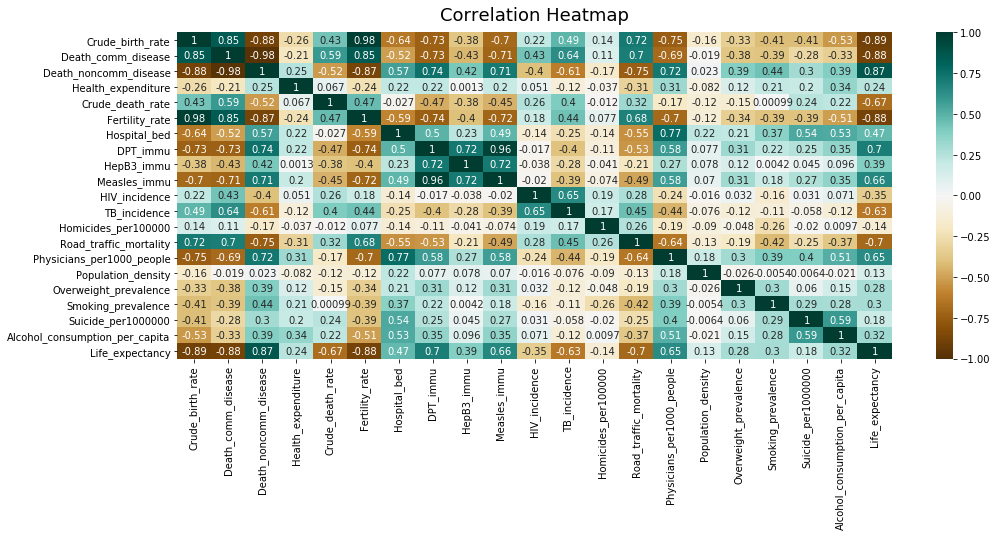

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

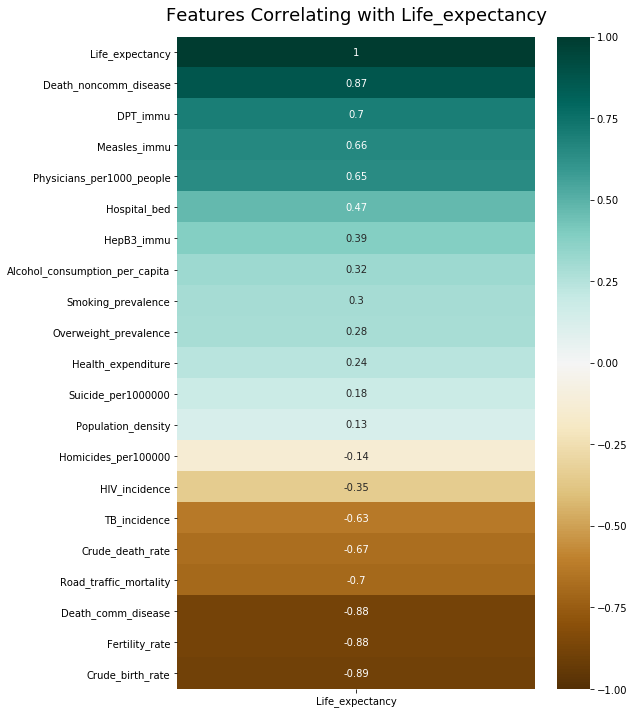

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Life_expectancy']].sort_values(by='Life_expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life_expectancy', fontdict={'fontsize':18}, pad=16);